In [1]:
import pandas as pd


In [112]:
car = pd.read_csv('german_used_cars.csv')
sal = pd.read_csv('salary_dataset.csv')

In [3]:
car.head()

,Unnamed: 0,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,0,alfa-romeo,Alfa Romeo GTV,red,10/1995,1995,1300,148,201,Manual,Petrol,"10,9 l/100 km",260 g/km,160500.0,2.0 V6 TB
1,1,alfa-romeo,Alfa Romeo 164,black,02/1995,1995,24900,191,260,Manual,Petrol,NaN,- (g/km),190000.0,"Q4 Allrad, 3.2L GTA"
2,2,alfa-romeo,Alfa Romeo Spider,black,02/1995,1995,5900,110,150,Unknown,Petrol,NaN,- (g/km),129000.0,ALFA ROME 916
3,3,alfa-romeo,Alfa Romeo Spider,black,07/1995,1995,4900,110,150,Manual,Petrol,"9,5 l/100 km",225 g/km,189500.0,2.0 16V Twin Spark L
4,4,alfa-romeo,Alfa Romeo 164,red,11/1996,1996,17950,132,179,Manual,Petrol,"7,2 l/100 km",- (g/km),96127.0,"3.0i Super V6, absoluter Topzustand !"


# Salary

In [4]:
sal.head()

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian


In [5]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           6704 non-null   int64  
 1   Age                  6702 non-null   float64
 2   Gender               6702 non-null   object 
 3   Education Level      6701 non-null   object 
 4   Job Title            6702 non-null   object 
 5   Years of Experience  6701 non-null   float64
 6   Salary               6699 non-null   float64
 7   Country              6704 non-null   object 
 8   Race                 6704 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 471.5+ KB


In [6]:
sal.isna().sum()

Unnamed: 0             0
Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
Country                0
Race                   0
dtype: int64

In [7]:
sal.shape

(6704, 9)

In [8]:
sal.describe()

,Unnamed: 0,Age,Years of Experience,Salary
count,6704.000000,6702.000000,6701.000000,6699.000000
mean,3351.500000,33.620859,8.094687,115326.964771
std,1935.422435,7.614633,6.059003,52786.183911
min,0.000000,21.000000,0.000000,350.000000
25%,1675.750000,28.000000,3.000000,70000.000000
50%,3351.500000,32.000000,7.000000,115000.000000
75%,5027.250000,38.000000,12.000000,160000.000000
max,6703.000000,62.000000,34.000000,250000.000000


In [9]:

sal.columns

Index(['Unnamed: 0', 'Age', 'Gender', 'Education Level', 'Job Title',
       'Years of Experience', 'Salary', 'Country', 'Race'],
      dtype='object')

In [10]:
sal.describe(include='object')

,Gender,Education Level,Job Title,Country,Race
count,6702,6701,6702,6704,6704
unique,3,7,193,5,10
top,Male,Bachelor's Degree,Software Engineer,USA,White
freq,3674,2267,518,1360,1968


In [11]:
sal.Country.unique()

array(['UK', 'USA', 'Canada', 'China', 'Australia'], dtype=object)

In [12]:
sal.Gender.unique()

array(['Male', 'Female', nan, 'Other'], dtype=object)

In [13]:
sal.Race.unique()

array(['White', 'Hispanic', 'Asian', 'Korean', 'Chinese', 'Australian',
       'Welsh', 'African American', 'Mixed', 'Black'], dtype=object)

### Гипотеза 1: мужчины чаще женщин занимают руководящие должности
    для этого я возьму только те вакансии где есть слово Senior или Director в названии вакансии
    я построю бар плот. и посмотрю кого там больше, мужчин или женщин

In [14]:

filtered_jobs = sal[sal['Job Title'].str.contains('Senior|Director', na=False, regex=True)]

In [15]:
filtered_jobs

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
2,2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
4,4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian
9,9,38.0,Male,PhD,Senior Scientist,10.0,110000.0,Australia,Australian
17,17,39.0,Male,PhD,Senior Engineer,12.0,115000.0,UK,Mixed
19,19,51.0,Male,Bachelor's,Sales Director,22.0,180000.0,Australia,Asian
...,...,...,...,...,...,...,...,...,...
6684,6684,37.0,Male,Bachelor's Degree,Sales Director,7.0,90000.0,China,Chinese
6685,6685,49.0,Female,PhD,Senior Product Marketing Manager,20.0,200000.0,China,White
6688,6688,46.0,Male,Master's Degree,Director of Marketing,16.0,160000.0,China,Chinese
6697,6697,51.0,Female,Master's Degree,Senior Product Marketing Manager,19.0,190000.0,UK,White


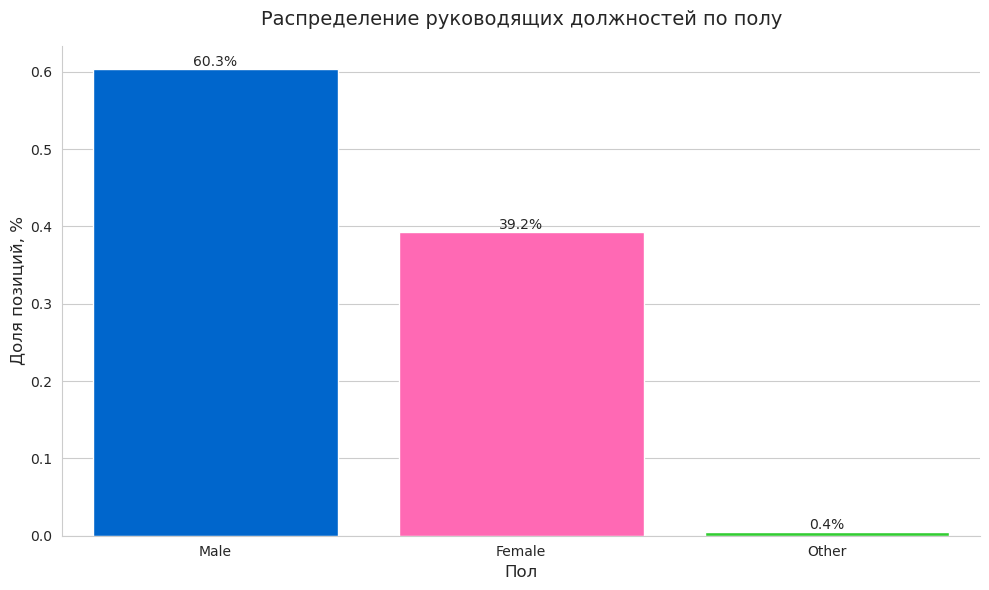

In [31]:

import seaborn as sns

plt.figure(figsize=(10, 6)) # размер графика
sns.set_style("whitegrid") # стиль графика
sns.set_palette("husl") # палитра цветов

ax = sns.barplot(x=filtered_jobs.Gender.value_counts(normalize=True).index, 
                 y=filtered_jobs.Gender.value_counts(normalize=True).values)

plt.title('Распределение руководящих должностей по полу', fontsize=14, pad=15)
plt.xlabel('Пол', fontsize=12)
plt.ylabel('Доля позиций, %', fontsize=12)

# добавляю проценты над столбцами
for i, v in enumerate(filtered_jobs.Gender.value_counts(normalize=True).values):
    ax.text(i, v, f'{v:.1%}', ha='center', va='bottom')

# удаляю верхнюю и правую границы графика
sns.despine()

# устанавливаю цвета для столбцов
ax.patches[0].set_facecolor('#0066CC')  # синий для мужчин
ax.patches[1].set_facecolor('#FF69B4')  # розовый для женщин
ax.patches[2].set_facecolor('#32CD32')  # зеленый для other
plt.tight_layout() # улучшает расположение подписей
plt.show() # показывает график


    на графике видно, что мужчины занимают большинство руководящих должностей

### Гипотеза 2: Белые занимают большинство руководящих должностей
    принцип такой же как и в предыдущем графике


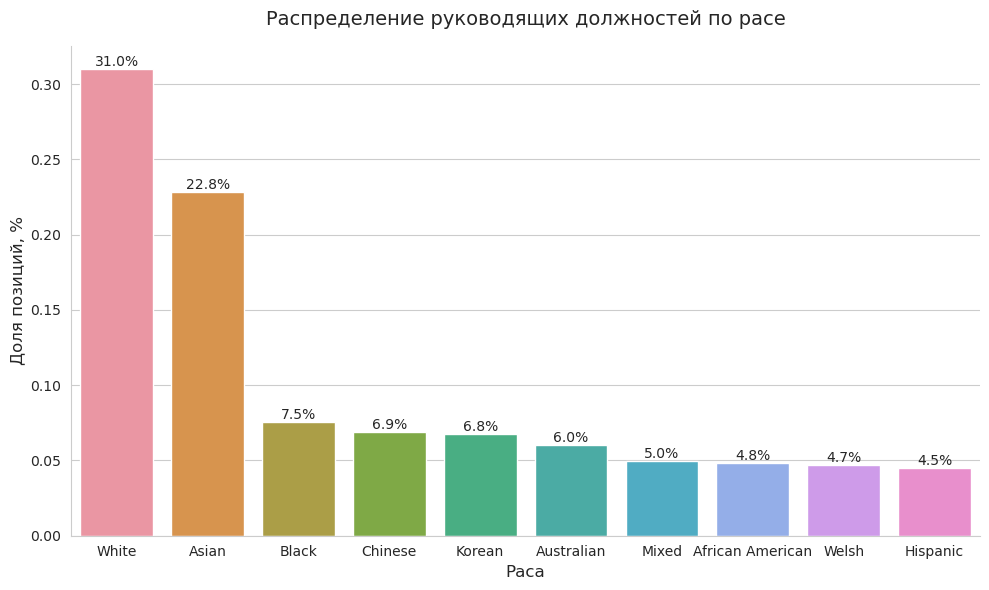

In [34]:

import seaborn as sns

plt.figure(figsize=(10, 6)) # размер графика
sns.set_style("whitegrid") # стиль графика
sns.set_palette("husl") # палитра цветов

ax = sns.barplot(x=filtered_jobs.Race.value_counts(normalize=True).index, 
                 y=filtered_jobs.Race.value_counts(normalize=True).values)

plt.title('Распределение руководящих должностей по расе', fontsize=14, pad=15)
plt.xlabel('Раса', fontsize=12)
plt.ylabel('Доля позиций, %', fontsize=12)

# добавляю проценты над столбцами
for i, v in enumerate(filtered_jobs.Race.value_counts(normalize=True).values):
    ax.text(i, v, f'{v:.1%}', ha='center', va='bottom')

# удаляю верхнюю и правую границы графика
sns.despine()


plt.tight_layout() # улучшает расположение подписей
plt.show() # показывает график

In [35]:
sal.head()
    

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian


### Гипотеза 3: Средняя зарплата в США выше чем в других странах
    для этого построю график распределения средней зарплаты по странам

In [40]:
sal.groupby('Country')['Salary'].mean().sort_values(ascending=False) # короче график не нужен и так все видно

Country
Canada       116556.732830
China        116271.373790
UK           115939.161677
Australia    114917.382485
USA          112995.487859
Name: Salary, dtype: float64

### Гипотеза 4: Влияние образования на зарплату
    для этого построю график распределения средней зарплаты по образованию


In [48]:

sal.groupby('Education Level')['Salary'].mean().sort_values(ascending=False) 
# тут мне кажется нужно объеденить некоторые категории образования. потому что  видно что в категориях есть опечатки
# "Bachelor's", "Master's", 'PhD', nan, "Bachelor's Degree", "Master's Degree", 'High School', 'phD'

Education Level
PhD                  165684.828947
Master's             157604.166667
Master's Degree      125075.333969
Bachelor's           124767.658730
phD                  120000.000000
Bachelor's Degree     85174.886093
High School           36706.694196
Name: Salary, dtype: float64

In [62]:
sal['new_education'] = sal['Education Level'].replace(["Bachelor's",  "Bachelor's Degree",],'Bachelor')
sal['new_education'] = sal['new_education'].replace(["Master's",  "Master's Degree",],'Master')
sal['new_education'] = sal['new_education'].replace(['PhD', 'phD'],'PhD')

In [63]:


sal['new_education'].unique()


array(['Bachelor', 'Master', 'PhD', nan, 'High School'], dtype=object)

In [67]:
sal['new_education'].value_counts()

new_education
Bachelor       3023
Master         1861
PhD            1369
High School     448
Name: count, dtype: int64

In [69]:
sal.groupby('new_education')['Salary'].mean().sort_values(ascending=False) 


new_education
PhD            165651.457999
Master         130112.056452
Bachelor        95082.908640
High School     36706.694196
Name: Salary, dtype: float64

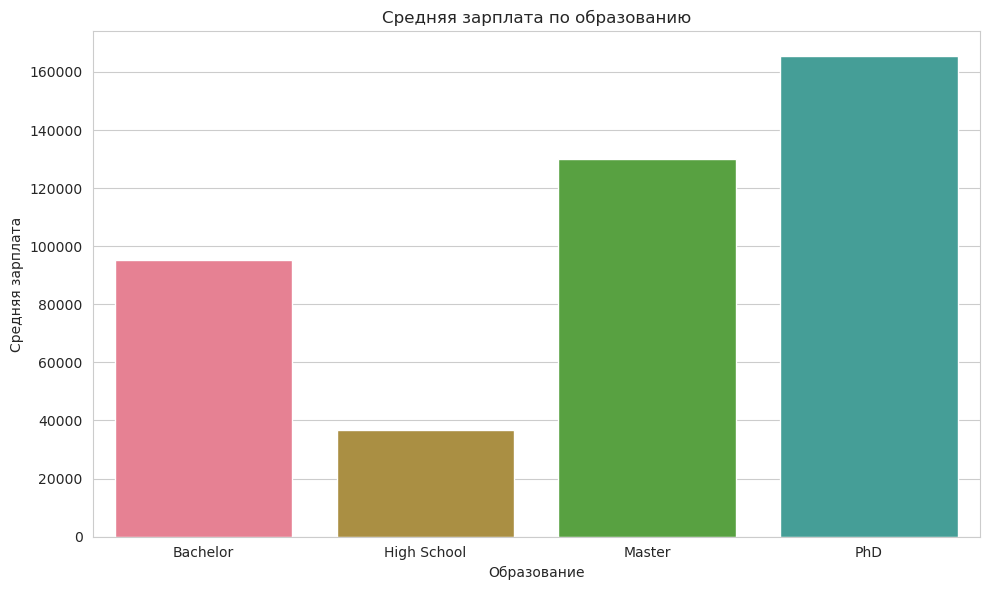

In [77]:
import seaborn as sns

plt.figure(figsize=(10, 6))


sns.barplot(x=sal.groupby('new_education')['Salary'].mean().index, 
            y=sal.groupby('new_education')['Salary'].mean().values)
plt.title('Средняя зарплата по образованию')
plt.xlabel('Образование')
plt.ylabel('Средняя зарплата')
plt.tight_layout()
plt.show()


    видно что средняя зарплата выше у людей с высшим образованием

# CAR

In [79]:
car.head()

,Unnamed: 0,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,0,alfa-romeo,Alfa Romeo GTV,red,10/1995,1995,1300,148,201,Manual,Petrol,"10,9 l/100 km",260 g/km,160500.0,2.0 V6 TB
1,1,alfa-romeo,Alfa Romeo 164,black,02/1995,1995,24900,191,260,Manual,Petrol,NaN,- (g/km),190000.0,"Q4 Allrad, 3.2L GTA"
2,2,alfa-romeo,Alfa Romeo Spider,black,02/1995,1995,5900,110,150,Unknown,Petrol,NaN,- (g/km),129000.0,ALFA ROME 916
3,3,alfa-romeo,Alfa Romeo Spider,black,07/1995,1995,4900,110,150,Manual,Petrol,"9,5 l/100 km",225 g/km,189500.0,2.0 16V Twin Spark L
4,4,alfa-romeo,Alfa Romeo 164,red,11/1996,1996,17950,132,179,Manual,Petrol,"7,2 l/100 km",- (g/km),96127.0,"3.0i Super V6, absoluter Topzustand !"


In [87]:
car.info()
car.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251079 entries, 0 to 251078
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                251079 non-null  int64  
 1   brand                     251079 non-null  object 
 2   model                     251079 non-null  object 
 3   color                     250913 non-null  object 
 4   registration_date         251075 non-null  object 
 5   year                      251079 non-null  object 
 6   price_in_euro             251079 non-null  object 
 7   power_kw                  250945 non-null  object 
 8   power_ps                  250950 non-null  object 
 9   transmission_type         251079 non-null  object 
 10  fuel_type                 251079 non-null  object 
 11  fuel_consumption_l_100km  224206 non-null  object 
 12  fuel_consumption_g_km     251079 non-null  object 
 13  mileage_in_km             250927 non-null  f

Index(['Unnamed: 0', 'brand', 'model', 'color', 'registration_date', 'year',
       'price_in_euro', 'power_kw', 'power_ps', 'transmission_type',
       'fuel_type', 'fuel_consumption_l_100km', 'fuel_consumption_g_km',
       'mileage_in_km', 'offer_description'],
      dtype='object')

In [82]:
car.isna().sum()


Unnamed: 0                      0
brand                           0
model                           0
color                         166
registration_date               4
year                            0
price_in_euro                   0
power_kw                      134
power_ps                      129
transmission_type               0
fuel_type                       0
fuel_consumption_l_100km    26873
fuel_consumption_g_km           0
mileage_in_km                 152
offer_description               1
dtype: int64

In [83]:
car.shape


(251079, 15)

In [84]:
car.describe()


,Unnamed: 0,mileage_in_km
count,251079.000000,2.509270e+05
mean,125539.000000,8.534002e+04
std,72480.408456,7.871706e+04
min,0.000000,0.000000e+00
25%,62769.500000,2.490400e+04
50%,125539.000000,6.750000e+04
75%,188308.500000,1.265000e+05
max,251078.000000,3.800000e+06


In [85]:
car.describe(include='object')

,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,offer_description
count,251079,251079,250913,251075,251079,251079,250945,250950,251079,251079,224206,251079,251078
unique,47,1312,14,433,91,18228,596,578,4,136,621,1500,200945
top,volkswagen,Volkswagen Golf,black,03/2023,2019,19990,110,150,Automatic,Petrol,"4,9 l/100 km",- (g/km),Titanium
freq,33281,7588,58720,4746,29225,1592,25986,25987,131749,143280,8158,35809,174


In [86]:
car

,Unnamed: 0,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,0,alfa-romeo,Alfa Romeo GTV,red,10/1995,1995,1300,148,201,Manual,Petrol,"10,9 l/100 km",260 g/km,160500.0,2.0 V6 TB
1,1,alfa-romeo,Alfa Romeo 164,black,02/1995,1995,24900,191,260,Manual,Petrol,NaN,- (g/km),190000.0,"Q4 Allrad, 3.2L GTA"
2,2,alfa-romeo,Alfa Romeo Spider,black,02/1995,1995,5900,110,150,Unknown,Petrol,NaN,- (g/km),129000.0,ALFA ROME 916
3,3,alfa-romeo,Alfa Romeo Spider,black,07/1995,1995,4900,110,150,Manual,Petrol,"9,5 l/100 km",225 g/km,189500.0,2.0 16V Twin Spark L
4,4,alfa-romeo,Alfa Romeo 164,red,11/1996,1996,17950,132,179,Manual,Petrol,"7,2 l/100 km",- (g/km),96127.0,"3.0i Super V6, absoluter Topzustand !"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251074,251074,volvo,Volvo XC40,white,04/2023,2023,57990,192,261,Automatic,Hybrid,NaN,43 km Reichweite,1229.0,Plus Bright T5 Recharge Intellisafe*Surround+P...
251075,251075,volvo,Volvo XC90,white,03/2023,2023,89690,173,235,Automatic,Diesel,"7,6 l/100 km",202 g/km,4900.0,B5 AWD Diesel Ultimate Dark 7-Sitzer Massage F...
251076,251076,volvo,Volvo V60,white,05/2023,2023,61521,145,197,Automatic,Diesel,"4,7 l/100 km",125 g/km,1531.0,"B4 D Plus Dark 145 kW, 5-türig (Diesel)"
251077,251077,volvo,Volvo XC40,white,05/2023,2023,57890,132,179,Automatic,Hybrid,NaN,45 km Reichweite,1500.0,T5 Recharge Plus Dark *Standh*360°*beh.Lenk


In [89]:
car['transmission_type'].value_counts()



transmission_type
Automatic         131749
Manual            117869
Unknown             1144
Semi-automatic       317
Name: count, dtype: int64

#### Гипотеза 1: Альфа Ромео чаще встречается с механической коробкой передач
    знаю, так себе гипотеза, но у меня была альфа и хотел бы попрактиковаться в построении графиков на ней


In [96]:
car[car['brand'] == 'alfa-romeo'].groupby('transmission_type').count() # в общем график не нужен

,Unnamed: 0,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
transmission_type,,,,,,,,,,,,,,
Automatic,894,894,894,894,894,894,894,892,892,894,830,894,893,894
Manual,524,524,524,524,524,524,524,524,524,524,497,524,524,524
Semi-automatic,5,5,5,5,5,5,5,5,5,5,4,5,5,5
Unknown,14,14,14,14,14,14,14,14,14,14,12,14,14,14


#### Гипотеза 2: машины с автоматической коробкой дороже машин с механической коробкой
    я построю график распределения цен в зависимости от типа коробки передач

In [104]:
# оказалось после нескольких запусков разных строчек кода. что price_in_euro типа object
# поэтому я привожу его к типу int
car['price_in_euro'].info()


<class 'pandas.core.series.Series'>
RangeIndex: 251079 entries, 0 to 251078
Series name: price_in_euro
Non-Null Count   Dtype 
--------------   ----- 
251079 non-null  object
dtypes: object(1)
memory usage: 1.9+ MB


In [113]:
# заменю все не числовые значения на NaN 
car['price_in_euro'] = pd.to_numeric(car['price_in_euro'].str.replace(' ', ''), errors='coerce')

# Теперь вы можете проверить среднюю цену в зависимости от типа коробки передач
mean_price_by_transmission = car.groupby('transmission_type')['price_in_euro'].mean()
print(mean_price_by_transmission)

transmission_type
Automatic         35919.724992
Manual            15151.109900
Semi-automatic    37085.984227
Unknown           28571.258093
Name: price_in_euro, dtype: float64


In [117]:
car['transmission_type'].value_counts()



transmission_type
Automatic         131749
Manual            117869
Unknown             1144
Semi-automatic       317
Name: count, dtype: int64

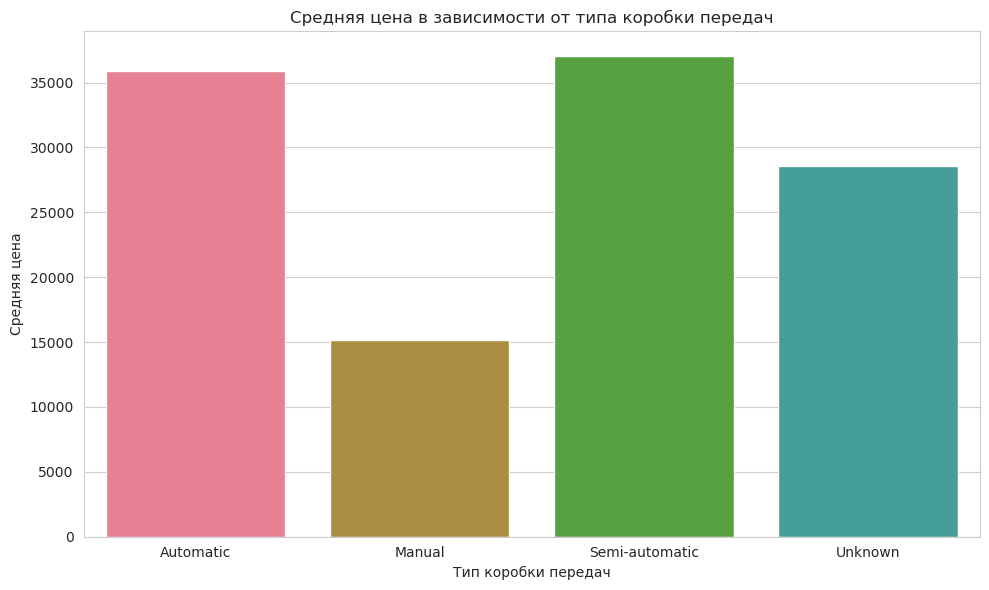

In [118]:
# график средней цены в зависимости от типа коробки передач
plt.figure(figsize=(10, 6))
sns.barplot(x=car.groupby('transmission_type')['price_in_euro'].mean().index, 
            y=car.groupby('transmission_type')['price_in_euro'].mean().values)
plt.title('Средняя цена в зависимости от типа коробки передач')
plt.xlabel('Тип коробки передач')
plt.ylabel('Средняя цена')
plt.tight_layout()
plt.show()

    если не брать в расчет Unknown, то машины с автоматической коробкой дороже машин с механической коробкой

#### Гипотеза 4: машины с большим пробегом дороже машин с маленьким пробегом

In [123]:
car['mileage_in_km'].info()


<class 'pandas.core.series.Series'>
RangeIndex: 251079 entries, 0 to 251078
Series name: mileage_in_km
Non-Null Count   Dtype  
--------------   -----  
250927 non-null  float64
dtypes: float64(1)
memory usage: 1.9 MB


In [125]:
car['mileage_in_km'].isna().sum()



152

In [128]:
car['mileage_in_km'].max()



3800000.0

In [129]:
# пока создам 4 категории пробега типа от 0 до 75  тысяч, от 75 до 150, от 150 до 300 и свыше 300 тысяч
car['mileage_category'] = pd.cut(car['mileage_in_km'], bins=[0, 75000, 150000, 300000, float('inf')], 
                                labels=['0-75', '75-150', '150-300', '300+'])

car['mileage_category'].value_counts()

mileage_category
0-75       135362
75-150      70085
150-300     41900
300+         3378
Name: count, dtype: int64

/home/alekspy/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


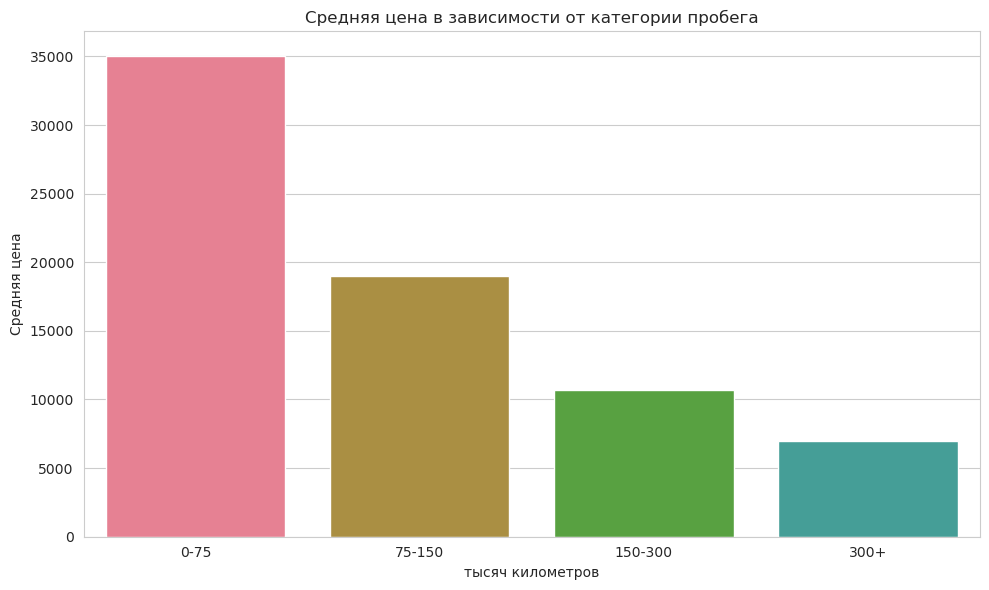

In [145]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=car.groupby('mileage_category', observed=False)['price_in_euro'].mean().index, 
            y=car.groupby('mileage_category', observed=False)['price_in_euro'].mean().values)
plt.title('Средняя цена в зависимости от категории пробега')
plt.xlabel('тысяч километров')
plt.ylabel('Средняя цена')
plt.tight_layout()
plt.show()


In [132]:
car.columns


Index(['Unnamed: 0', 'brand', 'model', 'color', 'registration_date', 'year',
       'price_in_euro', 'power_kw', 'power_ps', 'transmission_type',
       'fuel_type', 'fuel_consumption_l_100km', 'fuel_consumption_g_km',
       'mileage_in_km', 'offer_description', 'mileage_category'],
      dtype='object')

In [133]:
car['color'].value_counts()

color
black     58720
grey      46786
white     40640
silver    34362
blue      32092
red       21258
brown      4415
green      3500
orange     3367
beige      2420
yellow     1779
bronze      586
gold        580
violet      408
Name: count, dtype: int64

#### Гипотеза 5: машины красного цвета дороже машин других цветов
    я построю график распределения цен в зависимости от цвета



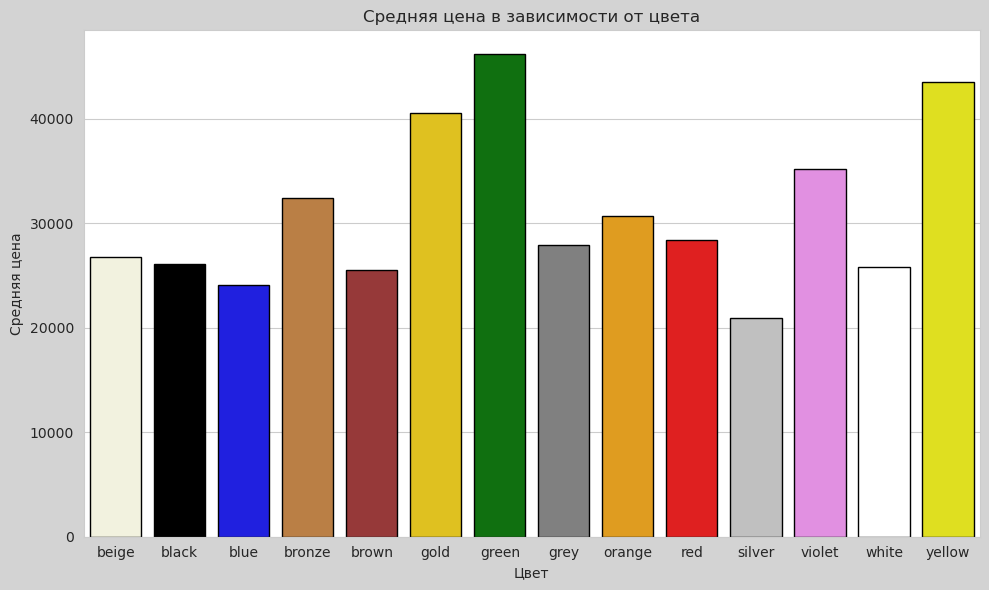

In [140]:
import seaborn as sns

plt.figure(figsize=(10, 6), facecolor='lightgrey')


color_palette = {
    'beige': '#f5f5dc',
    'black': '#000000',
    'blue': '#0000ff',
    'bronze': '#cd7f32',
    'brown': '#a52a2a',
    'green': '#008000',
    'grey': '#808080',
    'orange': '#ffa500',
    'red': '#ff0000',
    'silver': '#c0c0c0',
    'violet': '#ee82ee',
    'white': '#ffffff',
    'yellow': '#ffff00',
    'gold': '#ffd700',  
}
barplot = sns.barplot(x=car.groupby('color')['price_in_euro'].mean().index,
                      y=car.groupby('color')['price_in_euro'].mean().values,
                      palette=color_palette)

#  контуры
for bar in barplot.patches:
    bar.set_edgecolor('black')  #  цвет контура
    bar.set_linewidth(1)  #  толщину контура

plt.title('Средняя цена в зависимости от цвета')
plt.xlabel('Цвет')
plt.ylabel('Средняя цена')
plt.tight_layout()
plt.show()

судя по графику машины зеленого цвета дороже машин других цветов
но этих машин не так много. ттак что я построю тоже самое но для машин вот этих
black     58720
grey      46786
white     40640
silver    34362
blue      32092
red       21258


<Figure size 1000x600 with 0 Axes>

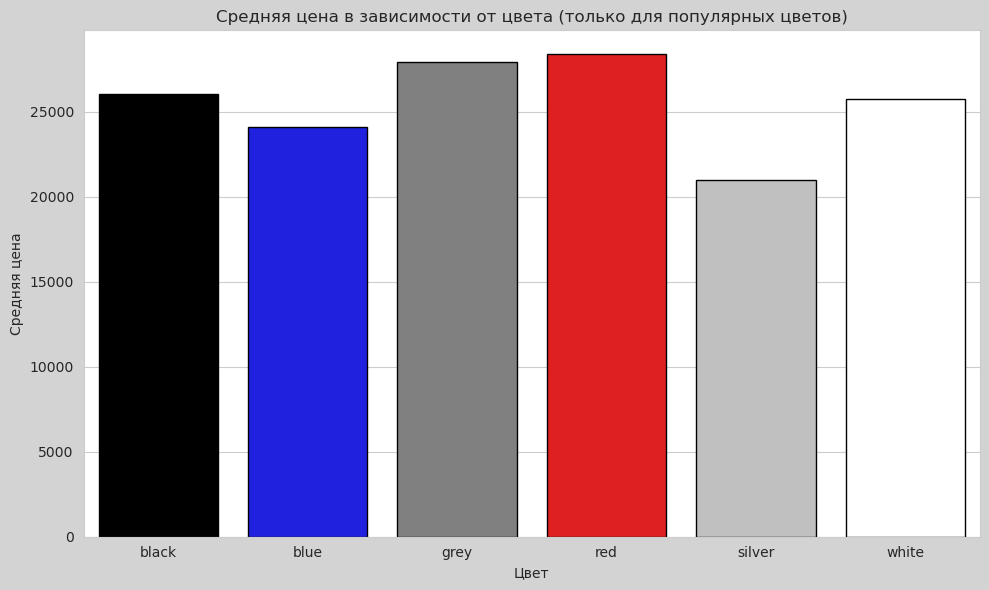

In [144]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6), facecolor='lightgrey')

color_palette = {
    'beige': '#f5f5dc',
    'black': '#000000',
    'blue': '#0000ff',
    'bronze': '#cd7f32',
    'brown': '#a52a2a',
    'green': '#008000',
    'grey': '#808080',
    'orange': '#ffa500',
    'red': '#ff0000',
    'silver': '#c0c0c0',
    'violet': '#ee82ee',
    'white': '#ffffff',
    'yellow': '#ffff00',
    'gold': '#ffd700',
}

# считаю количество машин для каждого цвета
car_counts = car['color'].value_counts()

# Фильтруую если цвета с количеством машин больше 20,000
filtered_colors = car_counts[car_counts > 20000].index

# Группирую данные только для отфильтрованных цветов
mean_prices = car.groupby('color')['price_in_euro'].mean()
filtered_mean_prices = mean_prices[mean_prices.index.isin(filtered_colors)]

plt.figure(figsize=(10, 6), facecolor='lightgrey')


barplot = sns.barplot(x=filtered_mean_prices.index, y=filtered_mean_prices.values, palette=color_palette)

#  контуры
for bar in barplot.patches:
    bar.set_edgecolor('black')  # цвет контура
    bar.set_linewidth(1)  #  толщину контура

plt.title('Средняя цена в зависимости от цвета (только для популярных цветов)')
plt.xlabel('Цвет')
plt.ylabel('Средняя цена')
plt.tight_layout()
plt.show()

    получаеся машины красного цвета в среднем немного дороже машин других цветов